## Naive Forecasts

In [1]:
import pandas as pd

In [2]:
test_data = {'Observed': [0,2,4,6,8]}
test_frame = pd.DataFrame(test_data)
test_frame.head()

,Observed
0,0
1,2
2,4
3,6
4,8


## Predictions
For naive predictions all need to do for prediction is a shift

In [3]:
test_frame['Predicted'] = test_frame['Observed'].shift()
test_frame.head()

,Observed,Predicted
0,0,NaN
1,2,0.0
2,4,2.0
3,6,4.0
4,8,6.0


Don't like the float values and the NaN value of the predicted column


In [4]:
# drop every row with NaN in it
test_frame = test_frame.dropna()

# change predicted column type to int
test_frame['Predicted'] = test_frame['Predicted'].astype(int)

test_frame.head()


,Observed,Predicted
1,2,0
2,4,2
3,6,4
4,8,6


<AxesSubplot:>

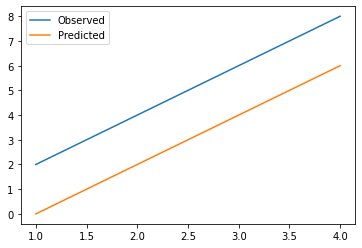

In [5]:
test_frame.plot()

In [6]:
import yfinance as yf

snow_tick = yf.Ticker('SNOW')
snow_frame = snow_tick.history(start='2021-01-01', end='2021-01-30')

# create new df with only close prices
snow_naive = snow_frame['Close'].rename('Observed').to_frame()
# create naive predicted column based on previous values
snow_naive['Predicted'] = snow_naive['Observed'].shift()
# drop na (first row)
snow_naive = snow_naive.dropna()

snow_naive.head()

,Observed,Predicted
Date,,
2021-01-05,283.829987,278.239990
2021-01-06,268.019989,283.829987
2021-01-07,304.200012,268.019989
2021-01-08,300.100006,304.200012
2021-01-11,293.190002,300.100006


<AxesSubplot:xlabel='Date'>

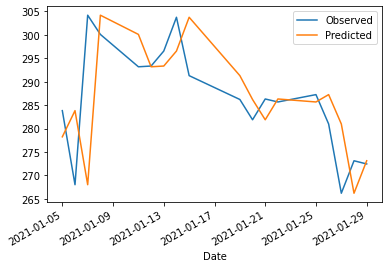

In [7]:
snow_naive.plot()

<AxesSubplot:xlabel='[Observed]', ylabel='[Predicted]'>

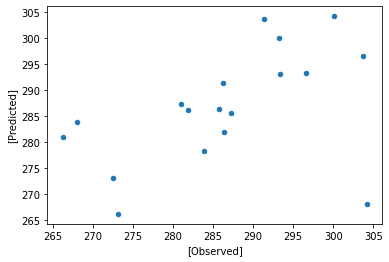

In [8]:
snow_naive.plot.scatter(['Observed'],['Predicted'])

## 3.3 Seasonal Naive Foreecasting

Same as naive but instead shifting by the amount of seasonality


In [34]:
# select the first 36 months of data with [0:36]

co2_frame = pd.read_csv('./data/CO2_monthly.csv')[0:36]
co2_frame.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [35]:
# interpolated is the data we need
co2_seasonal_naive = pd.DataFrame(co2_frame['Interpolated'].rename('Observed'))

# make index the date
co2_seasonal_naive.index = co2_frame['Date']

co2_seasonal_naive.head(3)

,Observed
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50


### Predictions - Saesonal Naive
Seasonal Predictions - this is monthly so prediction of this month is what it was last year this month (shift 12  )
Ex. This January is going to be the same as last January

<AxesSubplot:xlabel='Date'>

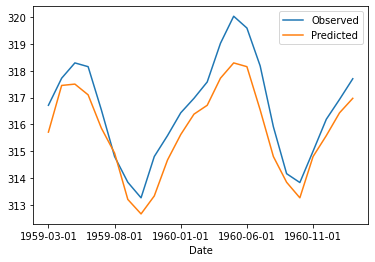

In [38]:
co2_seasonal_naive['Predicted'] = co2_seasonal_naive['Observed'].shift(12)
co2_seasonal_naive.dropna().plot()

Can see that the orange (predicted) is always lower than the blue (Observed) but similar shape  
Overall predicitions to low because data has a trend (upwards) as well as seasonality

### Trending Data - Normal Naive

To deal with trend now going to use ordinary naive predictions which takes account of trend and compare


<AxesSubplot:xlabel='Date'>

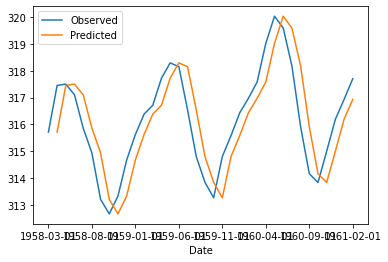

In [39]:
co2_naive = pd.DataFrame(co2_frame['Interpolated'].rename('Observed'))
co2_naive.index = co2_frame['Date']


co2_naive['Predicted'] = co2_naive['Observed'].shift(1)
co2_naive.plot()

## Function to create naive lagged data
Takes DF, column name, and the amount of shift  
Returns same df with predicted column equal to specified shift of observed column

In [13]:
def predicted_lagged_naive (df, column, number):
    predicted = column.shift(number)
    df['Predicted'] = predicted

## 3.4 - Predicting with Averages


<AxesSubplot:>

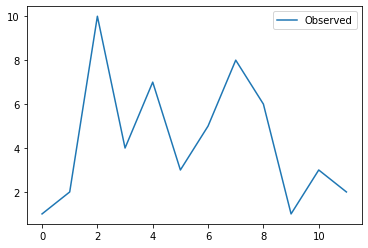

In [14]:
data_avg = {'Observed': [1,2,10,4,7,3,5,8,6,1,3,2]}
df = pd.DataFrame(data_avg)
df.plot()

<AxesSubplot:>

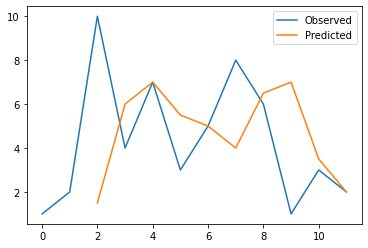

In [15]:
#Calculate predicted using the average of the last 2 observed data points
df['Predicted'] = 1/2 * (df['Observed'].shift() + df['Observed'].shift(2))
df.plot()

### Pandas CumSum Function
Gives running sum of observations  
To get the same result as above - sum of last 2 observations:  
- Take the cumsum of the current observation 
- subtract it from the cumsum of the observation 2 before
- Get the sum of previous 2 observations  

Then just need to divide by 2 to get average of last 2 observations

In [16]:
### Pandas CUMSUM function
df = pd.DataFrame(data_avg)
df['Sums'] = df['Observed'].cumsum()
print(df)

    Observed  Sums
0          1     1
1          2     3
2         10    13
3          4    17
4          7    24
5          3    27
6          5    32
7          8    40
8          6    46
9          1    47
10         3    50
11         2    52


<AxesSubplot:>

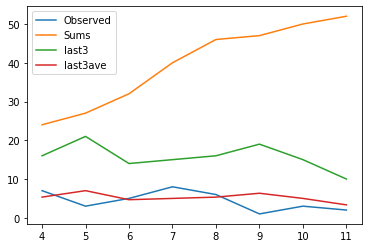

In [40]:
# LAST 3
df['last3ave'] = (df['Observed'].cumsum().shift(1) - df['Observed'].cumsum().shift(4)) /3
# df['last3ave'] = df['last3'] /3
# df = df.drop('last3')
df.dropna().plot()

## Function to create a prediction col using averages 
### based on last 'p' observations

In [18]:
def predict_average (df, col_name, p):
    df['Predicted'] = \
        (df[col_name].shift(1).cumsum() - df[col_name].shift(p+1).cumsum()) / p


## 3.5 Difference Averages

Use differences in predictions.  
- take differences of observed column, make new column called 'Differences'
- use averages to predict next differences value
- make 'Predicted' column that uses that prediction of difference and takes it back into space of values

In [19]:
da_data = {'Observed': [2,4,7,11,16,22,30,40,52]}
my_df = pd.DataFrame(da_data)


In [20]:
# make new column called differences = differences of adjacent data points

def make_diff_col(df, column):
    df['Differences'] = df[column] - df[column].shift()

make_diff_col(my_df, 'Observed')

<AxesSubplot:>

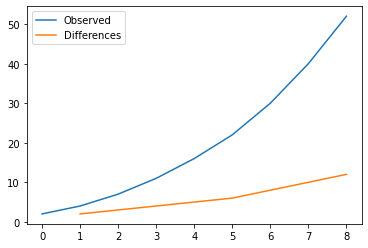

In [21]:
my_df.plot()

### Time to Predict
Going to predict differences column using averaging method.  
Start by predicting the average of the last two.
 - Prediction for difference at Time 't' is average of differences of observed values calculated at time t-1 and t-2
 - get the values at previous times by shifting the 'Differences' column

In [22]:
my_df['Pred_of_diff'] = 1/2*(my_df['Differences'].shift() + my_df['Differences'].shift(2))
my_df.head()

,Observed,Differences,Pred_of_diff
0,2,NaN,NaN
1,4,2.0,NaN
2,7,3.0,NaN
3,11,4.0,2.5
4,16,5.0,3.5


To get 'Predicted' col we add the 'present' prediction of difference to the last observed value.  
At time T we use prediction for difference at T and add that to observed at T-1

In [23]:
my_df['Predicted'] = (my_df['Observed'].shift() + my_df['Pred_of_diff'])
my_df.dropna().head(10)

,Observed,Differences,Pred_of_diff,Predicted
3,11,4.0,2.5,9.5
4,16,5.0,3.5,14.5
5,22,6.0,4.5,20.5
6,30,8.0,5.5,27.5
7,40,10.0,7.0,37.0
8,52,12.0,9.0,49.0


### Function: Prediction based on average of differences

In [24]:
# build function to do what we did above
# p = num_to_average


# make the prediction of the value based on the prediction difference

def diff_ave (df, p, col):
    differences = df[col] - df[col].shift()
    pred_of_diff = 1/p * ( differences.cumsum().shift(1) - differences.cumsum().shift(p+1) )
    df['Predicted'] = pred_of_diff.shift(1) + df[col].shift()

new_data = {'Observed': [2,4,6,8,10,12,14,16,18,20]}
my_new_df = pd.DataFrame(new_data)

diff_ave(my_new_df,2,'Observed')


In [25]:
snow_frame1 = snow_frame['Close'].to_frame()
snow_frame1.head()

,Close
Date,
2021-01-04,278.239990
2021-01-05,283.829987
2021-01-06,268.019989
2021-01-07,304.200012
2021-01-08,300.100006


In [26]:
diff_ave(snow_frame1,4,'Close')
snow_frame1 = snow_frame1.dropna()
snow_frame1.head()

,Close,Predicted
Date,,
2021-01-13,296.549988,295.690010
2021-01-14,303.760010,302.882492
2021-01-15,291.299988,301.847504
2021-01-19,286.209991,292.214989
2021-01-20,281.880005,285.737488


<AxesSubplot:xlabel='Date'>

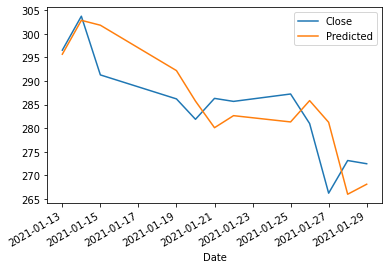

In [27]:
snow_frame1.plot()

## 3.8 Evaluating Forecasts

In [28]:
snow_frame2 = snow_frame1['Close'].rename('Observed').to_frame()
snow_frame2.head()

,Observed
Date,
2021-01-13,296.549988
2021-01-14,303.760010
2021-01-15,291.299988
2021-01-19,286.209991
2021-01-20,281.880005


### Naive Difference Predictions
based on naive predictinos already done  
get difference from current and previous observations
get predicted difference by taking previous difference  
Predicted value = predicted difference + previous observed value

In [29]:

def pred_diff_naive (df, column):
    # difference of observed values t and t-1
    dif = df[column] - df[column].shift()
    # pred naive diff = pred difference shifted
    pred_of_dif = dif.shift()
    # predicted value = t-1 + predicted difference
    df['Predicted'] = df[column].shift(1) + pred_of_dif

In [30]:
pred_diff_naive(snow_frame2, 'Observed')

<AxesSubplot:xlabel='Date'>

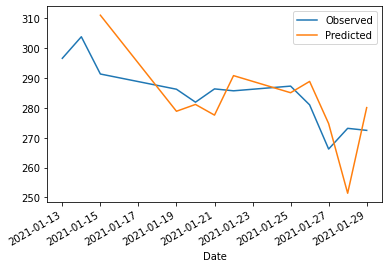

In [31]:
snow_frame2.plot()

## Assess Prediction Function

In [41]:
def assess_pred(df, pred_col, obs_col):
    # set counters for squared error and number of predicted values
    total_err_sq = 0
    number_of_pred = 0
    # get predicted and observed values from df
    predictions = df[pred_col]
    obs = df[obs_col]
    # loop through and keep cumulative total of each
    for val, pred in zip(obs, predictions):
        if pred > 0 and val > 0:
            total_err_sq += (pred-val)**2
            number_of_pred +=1

    # calc and return mean squared error
    return total_err_sq / number_of_pred
    

In [42]:
import numpy as np
mean_sq_error_sf2 = assess_pred(snow_frame2,'Predicted','Observed')
stdDev_sf2 = np.sqrt(mean_sq_error_sf2)
print(mean_sq_error_sf2, stdDev_sf2)

121.25304143838585 11.011495876509505
